# Download Data

In [82]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [83]:
#Download the dataset
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [84]:
#Read Data
df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv', index_col = False)

# EDA

In [85]:
#check for null values
def check_nulls():
    rows_size = len(df)
    null_sum = df.isnull().sum()
    null_percentage = (null_sum / rows_size) * 100
    return null_percentage
print("The current summary of null value is \n", check_nulls())

The current summary of null value is 
 Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


Since most of the attributes have less 7% we will drop rows of the attributes that have less than 7% null values overall.

In [86]:
candidates = check_nulls() < 7
candidates = candidates[candidates]
candidates = list(candidates.index)

num_rows = len(df)
df = df.dropna(subset = candidates)
print("Dropped Percentage",((num_rows - len(df))/num_rows) * 100, "%")

Dropped Percentage 7.472844768321188 %


In [87]:
#check for null values again
print("The current summary of null values is \n", check_nulls())

The current summary of null values is 
 Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      41.682889
Sunshine         45.957352
WindGustDir       4.468385
WindGustSpeed     4.458727
WindDir9am        5.614830
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       8.332714
Pressure3pm       8.285162
Cloud9am         37.275429
Cloud3pm         38.302994
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64


Notice that features that intuitively suggest a high correlation with our target variable (RainTomorrow) such as Evaporation, Sunshine, Cloud9am ,and Cloud3pm have a high precence of null values. That means that we can't really drop those columns. Also, notice the different data types and their domain.

* Evaporation |      Continuous | 0 - Inf| Replace with mean.
* Sunshine  |       Continous  | 0 - 24| Replace with mean.
* WindGustDir  |    Nominal    | TBD| Replace with mode.
* WindGustSpeed  |  Continous  | 0 - Inf| Replace with mean.
* WindDir9am    |   Nominal    | TBD| Replace with mode.
* Pressure9am | Continous |0 - Inf| Replace with mean.
* Pressure3pm | Continous | 0- Inf| Replace with mean.
* Cloud9am | Ordinal | TBD | Replace with mode.
* Cloud3pm | Ordinal | TBD | Replace with mode.

Where TBD is To Be Determined

In [88]:
candidates = check_nulls() != 0
candidates = candidates[candidates]
candidates = list(candidates.index)
fill_values = [
    df[candidates[0]].mean(),
    df[candidates[1]].mean(),
    df[candidates[2]].mode(),
    df[candidates[3]].mean(),
    df[candidates[4]].mode(),
    df[candidates[5]].mean(),
    df[candidates[6]].mean(),
    df[candidates[7]].mode(),
    df[candidates[8]].mode()
]
for i in range(len(fill_values)):
    df[candidates] = df[candidates].fillna(fill_values[i])


In [89]:
#Check for nulls one last time just to be sure...
print(check_nulls())

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64


With that, we are done with handling null values. Let's get to the real stuff :)

In [90]:
#get categorical columns
categorical_cols = df.select_dtypes('object').columns.tolist()
print(" A summary of unique values in categorical variables \n",df[categorical_cols].nunique())

 A summary of unique values in categorical variables 
 Date            3436
Location          49
WindGustDir       17
WindDir9am        17
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64


Looks like except RainToday and RainTomorrow, everything else is nominal. Let's do label encoding for the ordinals above.

In [91]:

#Save up the mappings
label_encodings = {}
def labelEncode(_df, _col_name):
    # creating instance of labelencoder
    labelencoder = LabelEncoder()
    df = _df
    col_name = _col_name
    #fit
    labelencoder.fit(df[col_name])
    mapped_from = labelencoder.classes_
    #transform
    df[col_name] = labelencoder.transform(df[col_name])
    mapped_to = labelencoder.transform(mapped_from)
    #concat the mapping
    res = dict(zip(mapped_from, mapped_to))
    return (res, df)
mapping, df = labelEncode(df, 'RainToday')
label_encodings['RainToday'] = mapping

mapping, df = labelEncode(df, 'RainToday')
label_encodings['RainToday'] = mapping


['No' 'Yes']
['No' 'Yes'] [0 1]


In [92]:
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
list(le.classes_)

le.transform(["tokyo", "tokyo", "paris"])
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

Let's seperate the dependent variable from the independent variables.

In [93]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]
cols = list(x.columns)

<AxesSubplot:>

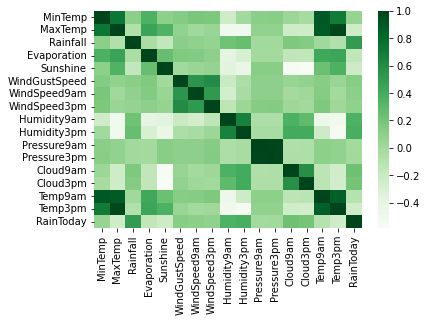

In [94]:
#Let's check which features have the highest correlation
sns.heatmap(df.corr(), cmap = 'Greens' )

Recall that,
* Evaporation |      Continuous 
* Sunshine  |       Continous  
* WindGustDir  |    Nominal   
* WindGustSpeed  |  Continous  
* WindDir9am    |   Nominal   
* Pressure9am | Continous 
* Pressure3pm | Continous
* Cloud9am | Ordinal 
* Cloud3pm | Ordinal 

In [95]:
nominal_free_df = x.loc[:, ~x.columns.isin(categorical_cols)]

